In [22]:
#%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.model_selection import train_test_split

#from sklearn.datasets import fetch_mldata
import seaborn as sns
import sklearn as sklearn
from sklearn.neighbors import KNeighborsClassifier
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

import graphviz 
import statsmodels.api as sm
from sklearn import tree
import xgboost as xgb
from sklearn.decomposition import PCA

In [23]:

data_set = 'C:\\Users\\ferri\\Downloads\\PoliTO\\Tesi\\DSs\\Emotion-Stress\\\WESAD\\'
s2_path = data_set + 'S2/S2.pkl'
#DO-NOT enable all at once otherwise Laptop goes to sleep due to very huge data size.
#s3_path = data_set + 'S3/S3.pkl'
#s4_path = data_set + 'S4/S4.pkl'
#s5_path = data_set + 'S5/S5.pkl'
#s6_path = data_set + 'S6/S6.pkl'
#s7_path = data_set + 'S7/S7.pkl
#s8_path = data_set + 'S8/S8.pkl'
#s9_path = data_set + 'S9/S9.pkl'
#s10_path = data_set + 'S10/S10.pkl'
#s11_path = data_set + 'S11/S11.pkl'
#s13_path = data_set + 'S13/S13.pkl'
#s14_path = data_set + 'S14/S14.pkl'
#s15_path = data_set + 'S15/S15.pkl'
#s16_path = data_set + 'S16/S16.pkl'
#s17_path = data_set + 'S17/S17.pkl'

with open(s2_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
'''
with open(s3_path, 'rb') as file:
    s3_data = pickle.load(file, encoding='latin1')
    
with open(s4_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
with open(s5_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
with open(s6_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
with open(s17_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
'''

"\nwith open(s3_path, 'rb') as file:\n    s3_data = pickle.load(file, encoding='latin1')\n    \nwith open(s4_path, 'rb') as file:\n    s2_data = pickle.load(file, encoding='latin1')\nwith open(s5_path, 'rb') as file:\n    s2_data = pickle.load(file, encoding='latin1')\nwith open(s6_path, 'rb') as file:\n    s2_data = pickle.load(file, encoding='latin1')\nwith open(s17_path, 'rb') as file:\n    s2_data = pickle.load(file, encoding='latin1')\n"

In [24]:
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Equated")

Equated


In [25]:
numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")



data frame combined


In [26]:
display(df.shape)
display(df.info)
display(df.describe)

(4255300, 9)

<bound method DataFrame.info of            c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
0        0.9554 -0.2220 -0.5580  0.021423 -0.004440  5.250549  30.120758   
1        0.9258 -0.2216 -0.5538  0.020325  0.004349  5.267334  30.129517   
2        0.9082 -0.2196 -0.5392  0.016525  0.005173  5.243301  30.138214   
3        0.8974 -0.2102 -0.5122  0.016708  0.007187  5.249405  30.129517   
4        0.8882 -0.2036 -0.4824  0.011673 -0.015152  5.286407  30.130951   
...         ...     ...     ...       ...       ...       ...        ...   
4255295  0.8750 -0.1234 -0.2974 -0.013138  0.020370  0.400162  31.457733   
4255296  0.8750 -0.1262 -0.2988 -0.010345  0.019592  0.355911  31.476898   
4255297  0.8718 -0.1238 -0.3042 -0.005447 -0.017166  0.360489  31.459229   
4255298  0.8730 -0.1234 -0.3026  0.000137 -0.028976  0.365829  31.484283   
4255299  0.8702 -0.1220 -0.3022  0.004074 -0.023575  0.365448  31.456268   

           c_resp  w_label  
0       -1.148987      0.0

<bound method NDFrame.describe of            c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
0        0.9554 -0.2220 -0.5580  0.021423 -0.004440  5.250549  30.120758   
1        0.9258 -0.2216 -0.5538  0.020325  0.004349  5.267334  30.129517   
2        0.9082 -0.2196 -0.5392  0.016525  0.005173  5.243301  30.138214   
3        0.8974 -0.2102 -0.5122  0.016708  0.007187  5.249405  30.129517   
4        0.8882 -0.2036 -0.4824  0.011673 -0.015152  5.286407  30.130951   
...         ...     ...     ...       ...       ...       ...        ...   
4255295  0.8750 -0.1234 -0.2974 -0.013138  0.020370  0.400162  31.457733   
4255296  0.8750 -0.1262 -0.2988 -0.010345  0.019592  0.355911  31.476898   
4255297  0.8718 -0.1238 -0.3042 -0.005447 -0.017166  0.360489  31.459229   
4255298  0.8730 -0.1234 -0.3026  0.000137 -0.028976  0.365829  31.484283   
4255299  0.8702 -0.1220 -0.3022  0.004074 -0.023575  0.365448  31.456268   

           c_resp  w_label  
0       -1.148987      0

In [27]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )

IQR is
 c_ax       0.271200
c_ay       0.054000
c_az       0.507400
c_ecg      0.112335
c_emg      0.012314
c_eda      0.746918
c_temp     1.240173
c_resp     3.100586
w_label    2.000000
dtype: float64


In [28]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)


(2100456, 9)


In [29]:
#mean normalization 
norm_df_out=(df_out-df_out.mean())/df_out.std()
#min-max normalization:
#norm_df_out=(df_out-df_out.min())/(df_out.max()-df_out.min())

norm_y = df_out.w_label #keep original labels Dont normalize labels
norm_x = norm_df_out.drop('w_label',axis=1)


norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)


In [30]:
norm_df_out.head()

c_ax      c_ay      c_az     c_ecg     c_emg     c_eda    c_temp  \
393691 -1.678430  2.251221 -1.593856 -0.326259 -0.675595  3.563482 -4.750996   
394476 -1.697992  2.116280 -1.564093 -1.913346 -1.408406  3.553901 -4.753546   
395154 -1.710440  2.244120 -1.574550  0.843406  1.302484  3.587000 -4.748553   
396635 -1.746005  1.952928 -1.606727 -1.452419  0.221203  3.586129 -4.753546   
402178 -1.712218  2.158892 -1.596269  0.766310 -0.537232  3.553901 -4.571494   

          c_resp   w_label  
393691 -0.416753 -0.108962  
394476  0.864869 -0.108962  
395154 -0.731728 -0.108962  
396635  1.121464 -0.108962  
402178  0.949722 -0.108962

In [31]:
norm_df_out.describe()

c_ax          c_ay          c_az         c_ecg         c_emg  \
count  2.100456e+06  2.100456e+06  2.100456e+06  2.100456e+06  2.100456e+06   
mean   1.682200e-16  6.227062e-17 -1.660144e-16  6.819729e-18 -1.407246e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -4.534372e+00 -3.814046e+00 -2.495604e+00 -2.629794e+00 -2.776663e+00   
25%   -1.750292e-02 -6.535731e-01 -4.483708e-01 -5.757211e-01 -6.448473e-01   
50%    4.164009e-01 -8.539912e-02  1.235676e-01  2.470093e-01  6.234153e-02   
75%    6.226834e-01  5.537980e-01  5.812790e-01  6.049576e-01  6.619147e-01   
max    4.150819e+00  3.856315e+00  3.420860e+00  2.775776e+00  2.732236e+00   

              c_eda        c_temp        c_resp       w_label  
count  2.100456e+06  2.100456e+06  2.100456e+06  2.100456e+06  
mean  -3.169550e-16 -2.865856e-15 -1.104147e-17  4.483701e-16  
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
min   -1.856971e+00 -4.756042e+00 -2.715254e+00 -7.712019e-01  
25%   -7.211407e-01 -6.176719e-01 -7.154357e-01 -7.712019e-01  
50%   -1.995722e-02 -1.520821e-01 -1.092451e-01 -7.712019e-01  
75%    3.711377e-01  7.266278e-01  7.331766e-01  5.532788e-01  
max    3.596582e+00  3.874975e+00  2.802235e+00  1.877759e+00

In [32]:
norm_df_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100456 entries, 393691 to 4255299
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   c_ax     float64
 1   c_ay     float64
 2   c_az     float64
 3   c_ecg    float64
 4   c_emg    float64
 5   c_eda    float64
 6   c_temp   float64
 7   c_resp   float64
 8   w_label  float64
dtypes: float64(9)
memory usage: 160.3 MB


In [33]:
norm_df_out.shape

(2100456, 9)

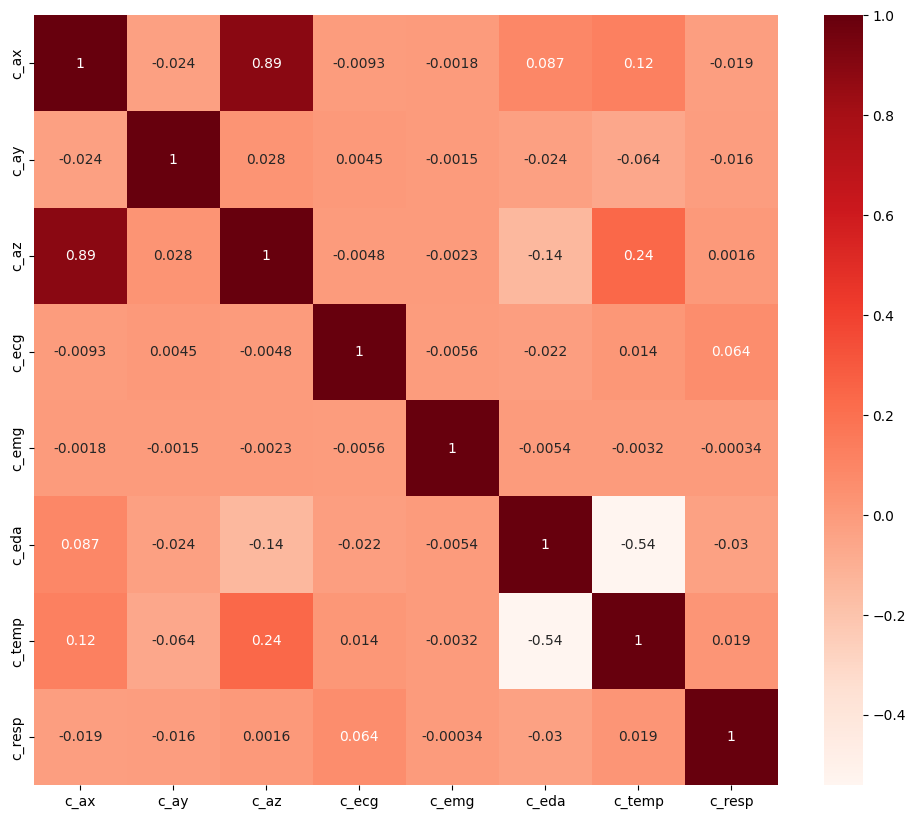

In [34]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = norm_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [35]:

X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const     0.000000e+00
c_ax      0.000000e+00
c_ay      0.000000e+00
c_az      0.000000e+00
c_ecg     7.725890e-02
c_emg     3.944850e-33
c_eda     0.000000e+00
c_temp    0.000000e+00
c_resp    0.000000e+00
dtype: float64

In [36]:
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection(sfs)
sfs = SFS(QuadraticDiscriminantAnalysis(),
           k_features=7,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
sfs.fit(norm_x, norm_y)
sfs.k_feature_names_     # to get the final set of features

('c_ay', 'c_az', 'c_ecg', 'c_emg', 'c_eda', 'c_temp', 'c_resp')

In [37]:
sfs = SFS(QuadraticDiscriminantAnalysis(),
           k_features=7,
           forward=False,
           floating=False,
           scoring = 'r2',
           cv = 0)
sfs.fit(norm_x, norm_y)
sfs.k_feature_names_     # to get the final set of features

('c_ay', 'c_az', 'c_ecg', 'c_emg', 'c_eda', 'c_temp', 'c_resp')

In [38]:
norm_x_train

c_ax      c_ay      c_az     c_ecg     c_emg     c_eda    c_temp  \
1667104  0.395061 -0.369487  0.070476  1.038350 -0.480862  0.525311 -0.500093   
1150663 -0.022838 -0.156420 -0.437109 -2.192546  1.471595  0.158605  0.582389   
3533302  0.608457 -0.873742  0.486358  0.395145  1.292235 -0.829149  1.750851   
1371952  0.352382 -2.294180  0.121154  0.832392  2.665616  0.042757 -1.165790   
1072105 -0.021060  0.326528 -0.335753 -1.972821 -0.209260  0.235256 -0.553784   
...           ...       ...       ...       ...       ...       ...       ...   
3210198  0.700928  2.712863  0.781578  0.001952  0.257075 -0.780371  0.350895   
3415113  0.704485 -0.873742  1.028533 -0.790490 -1.628762 -0.445023  1.372357   
4140403  0.636909  0.731352  1.800770  0.313092  1.015509 -1.386612  0.713776   
4178751  0.569334  0.951521  0.146895  0.541628 -0.767837 -1.411872  1.255946   
3162269  0.620905  1.462879  1.835360  0.077948  1.322983 -0.727238 -0.246825   

           c_resp  
1667104 -0.380096  
1150663 -0.343440  
3533302  0.156854  
1371952  1.353623  
1072105 -1.525953  
...           ...  
3210198 -0.646196  
3415113 -0.171018  
4140403  0.236277  
4178751  0.153460  
3162269  1.483957  

[1680364 rows x 8 columns]

In [39]:
norm_y_train

1667104    2.0
1150663    0.0
3533302    3.0
1371952    0.0
1072105    0.0
          ... 
3210198    0.0
3415113    3.0
4140403    0.0
4178751    0.0
3162269    0.0
Name: w_label, Length: 1680364, dtype: float64

In [40]:
norm_x_test

c_ax      c_ay      c_az     c_ecg     c_emg     c_eda    c_temp  \
3523453  0.594230 -0.497324  0.484749  0.574670  0.369815 -0.722883  1.584785   
1824205  0.370165  0.085054 -0.012378  0.015169 -0.573104  0.876338 -0.704449   
1470434  0.512429 -0.163523  0.291690 -1.810918 -1.772250  0.039273 -1.498878   
3074893 -2.375522 -0.440508 -1.893902 -1.216173 -0.035025 -0.695010 -0.077785   
3312030  0.427070 -1.292770  0.195160 -0.547085  0.779779 -0.793437 -0.080334   
...           ...       ...       ...       ...       ...       ...       ...   
3225483  0.697371  1.604923  0.553929 -1.991544  1.763694 -0.773403 -0.000833   
1219339 -0.117087  0.937316 -0.493418 -1.613221 -0.737089  0.117666  0.466615   
2113125  0.290142  0.447264 -0.113735  0.699126  1.174370  2.424168 -1.511517   
3239719  0.455524  2.173097  1.963262 -2.103334  2.209531 -0.689783 -0.090584   
3436424  0.706263 -0.760107  0.923155  0.503080 -0.183637 -0.588743  0.793702   

           c_resp  
3523453  0.653075  
1824205 -0.550481  
1470434 -0.407249  
3074893  1.173055  
3312030 -0.851201  
...           ...  
3225483 -0.103136  
1219339 -0.677422  
2113125 -1.345385  
3239719  0.857402  
3436424 -0.786034  

[420092 rows x 8 columns]

In [41]:
norm_y_test

3523453    3.0
1824205    2.0
1470434    0.0
3074893    4.0
3312030    0.0
          ... 
3225483    0.0
1219339    0.0
2113125    0.0
3239719    0.0
3436424    3.0
Name: w_label, Length: 420092, dtype: float64

In [42]:

y=df_out.w_label
x=df_out.drop('w_label',axis=1)
#print(x)
#print("\n-----\n")
#print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y

393691     1.0
394476     1.0
395154     1.0
396635     1.0
402178     1.0
          ... 
4255293    0.0
4255295    0.0
4255296    0.0
4255297    0.0
4255299    0.0
Name: w_label, Length: 2100456, dtype: float64

In [43]:
(x_train)


c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
3592095  0.9048 -0.1586 -0.1692  0.010941 -0.007004  0.584412  32.829285   
1058224  0.8290 -0.1170 -0.4346  0.027054  0.004349  1.224136  31.314941   
3657927  0.8926 -0.0796 -0.2082  0.100296 -0.010071  0.585938  31.963318   
2975481  0.5926 -0.1240 -0.7462  0.043076 -0.004807  0.889969  31.376709   
1806604  0.8910 -0.1288 -0.2934 -0.009613  0.007004  1.490402  31.075409   
...         ...     ...     ...       ...       ...       ...        ...   
3116879  0.5710 -0.1358 -0.7562 -0.054703 -0.007919  0.761414  31.316376   
3631162  0.8878 -0.1100 -0.2546 -0.000961 -0.000412  0.590134  32.459961   
1794034  0.8830 -0.1286 -0.2586 -0.035568  0.001419  1.498032  31.034302   
3389151  0.9138 -0.1414 -0.0648  0.031540  0.011581  0.813675  32.105743   
4230661  0.8922 -0.1382 -0.2182  0.155365 -0.000504  0.370407  31.211975   

           c_resp  
3592095  0.437927  
1058224 -3.907776  
3657927  2.688599  
2975481  1.612854  
1806604  0.309753  
...           ...  
3116879  1.182556  
3631162 -1.383972  
1794034 -4.554749  
3389151 -0.019836  
4230661  1.826477  

[1680364 rows x 8 columns]

In [44]:

(y_train)


3592095    0.0
1058224    0.0
3657927    0.0
2975481    4.0
1806604    2.0
          ... 
3116879    4.0
3631162    0.0
1794034    2.0
3389151    3.0
4230661    0.0
Name: w_label, Length: 1680364, dtype: float64

In [45]:
(x_test)


c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
2754138  0.9082 -0.1070 -0.0914 -0.101166 -0.005676  0.941849  32.153259   
3745803  0.8876 -0.0390 -0.2674 -0.110367  0.001190  0.775528  31.726440   
1768449  0.8926 -0.1430 -0.2278 -0.000549 -0.004166  1.382446  31.326660   
3245445  0.8954 -0.0828  0.2102  0.034836 -0.003250  0.810623  31.373779   
997770   0.6374 -0.0434 -0.7086  0.151108 -0.006134  1.117325  31.128235   
...         ...     ...     ...       ...       ...       ...        ...   
1449223  0.8794 -0.0894 -0.2632 -0.184158 -0.007965  1.129532  30.688873   
2095429  0.8646 -0.1158 -0.3204  0.042709 -0.001236  2.392578  30.458282   
1042967  0.8212 -0.1122 -0.4114  0.047104  0.001602  1.224518  30.955139   
1055230  0.8456 -0.1230 -0.3942  0.047562  0.003983  1.230621  31.294312   
1197497  0.8232 -0.1176 -0.4200  0.015335 -0.005814  1.176071  31.898071   

           c_resp  
2754138 -1.121521  
3745803  1.669312  
1768449 -4.911804  
3245445 -0.476074  
997770   3.546143  
...           ...  
1449223  1.010132  
2095429 -1.524353  
1042967 -1.725769  
1055230  6.092834  
1197497  0.044250  

[420092 rows x 8 columns]

In [46]:
(y_test)


2754138    0.0
3745803    0.0
1768449    2.0
3245445    0.0
997770     1.0
          ... 
1449223    0.0
2095429    0.0
1042967    0.0
1055230    0.0
1197497    0.0
Name: w_label, Length: 420092, dtype: float64

# Logistic Regression Base Model

In [47]:
clf = skl_lm.LogisticRegression(solver='newton-cg', penalty=None)
clf.fit(x_train, y_train)
y_out = clf.predict(x_test)
print(classification_report(y_test, y_out, digits=4))

#takes 20 minutes.
'''
(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=3,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False) or use slover=saga
'''                 

              precision    recall  f1-score   support

         0.0     0.8214    0.8941    0.8562    245883
         1.0     0.9835    0.8777    0.9276     10705
         2.0     0.7039    0.3981    0.5086     63387
         3.0     0.7910    0.8222    0.8063     48085
         4.0     0.9116    0.9998    0.9537     52032

    accuracy                         0.8237    420092
   macro avg     0.8423    0.7984    0.8105    420092
weighted avg     0.8155    0.8237    0.8119    420092



"\n(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=3,\n                   multi_class='warn', n_jobs=None, penalty='l2',\n                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,\n                   warm_start=False) or use slover=saga\n"

# Logistic Regression + L2

In [27]:
clf = skl_lm.LogisticRegression(solver='newton-cg',penalty='l2',multi_class='auto')
clf.fit(x_train,y_train)
y_out = clf.predict(x_test)
print(classification_report(y_test, y_out, digits=4))



C:\Users\ferri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

         0.0     0.8205    0.8932    0.8553    246315
         1.0     0.9823    0.8964    0.9374     10566
         2.0     0.7025    0.3971    0.5073     63658
         3.0     0.7857    0.8139    0.7996     47543
         4.0     0.9113    0.9999    0.9535     52010

    accuracy                         0.8224    420092
   macro avg     0.8404    0.8001    0.8106    420092
weighted avg     0.8140    0.8224    0.8105    420092



# LDA Basic Implementation

In [28]:
LDA= LinearDiscriminantAnalysis(solver = 'svd')
y_out = LDA.fit(x_train, y_train).predict(x_test)
#confusion_matrix(y_test, y_out)
print(classification_report(y_test, y_out, digits=4))#target_names=['Not Six', 'Six']

              precision    recall  f1-score   support

         0.0     0.8121    0.8667    0.8385    246315
         1.0     0.9710    0.6527    0.7806     10566
         2.0     0.6265    0.3700    0.4652     63658
         3.0     0.7478    0.8120    0.7786     47543
         4.0     0.8540    1.0000    0.9212     52010

    accuracy                         0.7964    420092
   macro avg     0.8023    0.7403    0.7568    420092
weighted avg     0.7859    0.7964    0.7840    420092



# QDA Basic Implementation

In [29]:
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(x_train,y_train)
y_out = qda_clf.fit(x_train, y_train).predict(x_test)
print(classification_report(y_test, y_out, digits=4))#target_names=['Not Six', 'Six']
#IF QDA is best, then data must be Gaussian

C:\Users\ferri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\ferri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\ferri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing 

              precision    recall  f1-score   support

         0.0     0.9754    0.8958    0.9339    246315
         1.0     0.8670    0.9521    0.9076     10566
         2.0     0.7977    0.9317    0.8595     63658
         3.0     0.8912    0.9861    0.9363     47543
         4.0     0.9392    0.9989    0.9681     52010

    accuracy                         0.9256    420092
   macro avg     0.8941    0.9529    0.9211    420092
weighted avg     0.9317    0.9256    0.9265    420092



In [30]:
qda_clf = QuadraticDiscriminantAnalysis()
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=5)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8729    0.9031    0.8877   1230433
         1.0     0.8648    0.9317    0.8970     53659
         2.0     0.7485    0.7179    0.7329    316935
         3.0     0.9045    0.7139    0.7980    239191
         4.0     0.9389    0.9985    0.9678    260238

    accuracy                         0.8662   2100456
   macro avg     0.8659    0.8530    0.8567   2100456
weighted avg     0.8657    0.8662    0.8643   2100456



# QDA + Normalization + Cross Validation = 10

In [31]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)   

              precision    recall  f1-score   support

         0.0     0.9473    0.8943    0.9200   1230433
         1.0     0.8798    0.9427    0.9101     53659
         2.0     0.7799    0.8881    0.8305    316935
         3.0     0.8922    0.9069    0.8995    239191
         4.0     0.9366    0.9985    0.9666    260238

    accuracy                         0.9089   2100456
   macro avg     0.8872    0.9261    0.9053   2100456
weighted avg     0.9127    0.9089    0.9097   2100456



In [32]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.5)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8380    0.8037    0.8205   1230433
         1.0     0.9813    0.7941    0.8778     53659
         2.0     0.5829    0.4384    0.5005    316935
         3.0     0.6677    0.9552    0.7860    239191
         4.0     0.8780    1.0000    0.9350    260238

    accuracy                         0.7899   2100456
   macro avg     0.7896    0.7983    0.7840   2100456
weighted avg     0.7887    0.7899    0.7839   2100456



In [33]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.9)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.7625    0.8220    0.7912   1230433
         1.0     0.9929    0.6342    0.7740     53659
         2.0     0.4651    0.3059    0.3690    316935
         3.0     0.6491    0.6136    0.6309    239191
         4.0     0.8525    1.0000    0.9204    260238

    accuracy                         0.7376   2100456
   macro avg     0.7444    0.6751    0.6971   2100456
weighted avg     0.7218    0.7376    0.7248   2100456



In [34]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.7)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.7977    0.8178    0.8076   1230433
         1.0     0.9887    0.7486    0.8521     53659
         2.0     0.5200    0.3503    0.4186    316935
         3.0     0.6728    0.8035    0.7324    239191
         4.0     0.8698    1.0000    0.9304    260238

    accuracy                         0.7664   2100456
   macro avg     0.7698    0.7440    0.7482   2100456
weighted avg     0.7554    0.7664    0.7567   2100456



# QDA + Normalization + Cross Validation = 20

In [35]:
qda_clf = QuadraticDiscriminantAnalysis()
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9647    0.8873    0.9243   1230433
         1.0     0.8790    0.9432    0.9100     53659
         2.0     0.7730    0.9054    0.8340    316935
         3.0     0.8858    0.9719    0.9269    239191
         4.0     0.9369    0.9990    0.9670    260238

    accuracy                         0.9149   2100456
   macro avg     0.8879    0.9414    0.9124   2100456
weighted avg     0.9211    0.9149    0.9159   2100456



# KNN + Cross Validation + K=3 + Normalization [ CV = 10, K = 3 ]

In [36]:
#Do base mdel with test and train data, show improvement in next section with cross validation
knn = KNeighborsClassifier(n_neighbors=3)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)
#https://www.ritchieng.com/machine-learning-cross-validation/

              precision    recall  f1-score   support

         0.0     0.9245    0.8220    0.8702   1230433
         1.0     0.9086    0.8866    0.8974     53659
         2.0     0.7062    0.9154    0.7973    316935
         3.0     0.7487    0.8514    0.7968    239191
         4.0     0.9013    0.9397    0.9201    260238

    accuracy                         0.8557   2100456
   macro avg     0.8379    0.8830    0.8564   2100456
weighted avg     0.8683    0.8557    0.8577   2100456



# KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9545    0.8799    0.9157   1230433
         1.0     0.9155    0.9165    0.9160     53659
         2.0     0.8234    0.9416    0.8785    316935
         3.0     0.8043    0.9206    0.8585    239191
         4.0     0.9060    0.9620    0.9332    260238

    accuracy                         0.9049   2100456
   macro avg     0.8807    0.9241    0.9004   2100456
weighted avg     0.9106    0.9049    0.9057   2100456



# KNN + Cross Validation + K=10 + Normalization [ CV = 10, K = 10 ]

In [38]:
knn = KNeighborsClassifier(n_neighbors=10)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9249    0.8253    0.8723   1230433
         1.0     0.9246    0.8831    0.9034     53659
         2.0     0.7107    0.9127    0.7992    316935
         3.0     0.7492    0.8527    0.7976    239191
         4.0     0.9024    0.9430    0.9222    260238

    accuracy                         0.8577   2100456
   macro avg     0.8423    0.8834    0.8589   2100456
weighted avg     0.8698    0.8577    0.8597   2100456



# KNN + Cross Validation [ CV = 10, K = 20 ]

In [39]:
knn = KNeighborsClassifier(n_neighbors=20)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9295    0.8213    0.8720   1230433
         1.0     0.9454    0.8815    0.9123     53659
         2.0     0.7058    0.9185    0.7982    316935
         3.0     0.7441    0.8621    0.7988    239191
         4.0     0.9030    0.9498    0.9258    260238

    accuracy                         0.8580   2100456
   macro avg     0.8456    0.8866    0.8614   2100456
weighted avg     0.8718    0.8580    0.8602   2100456



# KNN + Cross Validation [ CV = 10, K = 30 ]

In [40]:
knn = KNeighborsClassifier(n_neighbors=30)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9321    0.8199    0.8724   1230433
         1.0     0.9605    0.8802    0.9186     53659
         2.0     0.7034    0.9201    0.7973    316935
         3.0     0.7430    0.8689    0.8010    239191
         4.0     0.9037    0.9537    0.9280    260238

    accuracy                         0.8587   2100456
   macro avg     0.8485    0.8885    0.8635   2100456
weighted avg     0.8732    0.8587    0.8610   2100456



# KNN + Cross Validation [ CV = 10, K = 40 ]

In [41]:
knn = KNeighborsClassifier(n_neighbors=40)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9338    0.8191    0.8727   1230433
         1.0     0.9673    0.8792    0.9211     53659
         2.0     0.7017    0.9208    0.7964    316935
         3.0     0.7433    0.8738    0.8033    239191
         4.0     0.9042    0.9564    0.9296    260238

    accuracy                         0.8592   2100456
   macro avg     0.8501    0.8899    0.8646   2100456
weighted avg     0.8743    0.8592    0.8616   2100456



# KNN + Cross Validation [ CV = 10, K = 60 ]

In [42]:
knn = KNeighborsClassifier(n_neighbors=60)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9367    0.8185    0.8736   1230433
         1.0     0.9745    0.8774    0.9234     53659
         2.0     0.6999    0.9215    0.7956    316935
         3.0     0.7447    0.8825    0.8078    239191
         4.0     0.9046    0.9606    0.9318    260238

    accuracy                         0.8604   2100456
   macro avg     0.8521    0.8921    0.8664   2100456
weighted avg     0.8761    0.8604    0.8628   2100456



# KNN + Cross Validation [ CV = 10, K = 100 ]

In [43]:
knn = KNeighborsClassifier(n_neighbors=100)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9407    0.8172    0.8746   1230433
         1.0     0.9775    0.8741    0.9229     53659
         2.0     0.6977    0.9214    0.7941    316935
         3.0     0.7461    0.8951    0.8139    239191
         4.0     0.9049    0.9666    0.9347    260238

    accuracy                         0.8618   2100456
   macro avg     0.8534    0.8949    0.8680   2100456
weighted avg     0.8784    0.8618    0.8642   2100456



# Simple Decision Tree + Depth = 5

In [48]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

clf_i = clf.fit(x_train,y_train)

y_out_i = clf_i.predict(x_test)

lm_i=(classification_report(y_test, y_out_i, digits=4))
print(lm_i)

 

              precision    recall  f1-score   support

         0.0     0.9638    0.9287    0.9459    245883
         1.0     0.9982    0.9576    0.9775     10705
         2.0     0.8736    0.9948    0.9303     63387
         3.0     0.8441    0.8740    0.8588     48085
         4.0     0.9867    0.9653    0.9759     52032

    accuracy                         0.9377    420092
   macro avg     0.9333    0.9441    0.9377    420092
weighted avg     0.9402    0.9377    0.9381    420092



# Displaying and Drwaing the Tree

[Text(0.47767857142857145, 0.9166666666666666, 'x[2] <= -0.637\nentropy = 1.729\nsamples = 1680364\nvalue = [984550, 42954, 253548, 191106, 208206]'),
 Text(0.24107142857142858, 0.75, 'x[5] <= 1.041\nentropy = 1.001\nsamples = 271292\nvalue = [22452, 40634, 0, 0, 208206]'),
 Text(0.359375, 0.8333333333333333, 'True  '),
 Text(0.14285714285714285, 0.5833333333333334, 'x[6] <= 31.506\nentropy = 0.435\nsamples = 228658\nvalue = [20444, 9, 0, 0, 208205]'),
 Text(0.07142857142857142, 0.4166666666666667, 'x[6] <= 31.307\nentropy = 0.302\nsamples = 219481\nvalue = [11762, 9, 0, 0, 207710]'),
 Text(0.03571428571428571, 0.25, 'x[0] <= 0.571\nentropy = 0.99\nsamples = 23044\nvalue = [9868.0, 9.0, 0.0, 0.0, 13167.0]'),
 Text(0.017857142857142856, 0.08333333333333333, 'entropy = 0.987\nsamples = 16353\nvalue = [9271, 0, 0, 0, 7082]'),
 Text(0.05357142857142857, 0.08333333333333333, 'entropy = 0.448\nsamples = 6691\nvalue = [597, 9, 0, 0, 6085]'),
 Text(0.10714285714285714, 0.25, 'x[1] <= -0.138\ne

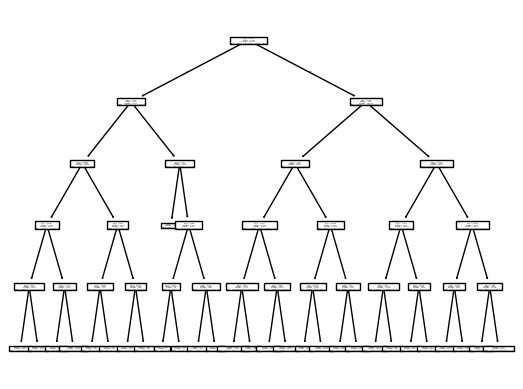

In [49]:
tree.plot_tree(clf_i) 

In [ ]:
#from sklearn import tree
#https://scikit-learn.org/stable/modules/tree.html

features_ax=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp"]
classes_ay=['0', '1', '2', '3', '4']

dot_data = tree.export_graphviz(clf_i, out_file=None, 
                      feature_names=features_ax,  
                      class_names=classes_ay,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Decision_tree")
graph 


# Simple Decision Tree + Depth = 5 + Cross Validation + Normalization

In [47]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)


norm_y_out = cross_val_predict(clf, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)


              precision    recall  f1-score   support

         0.0     0.9361    0.8394    0.8851   1230433
         1.0     0.8009    0.9360    0.8632     53659
         2.0     0.8695    0.9808    0.9218    316935
         3.0     0.6209    0.7785    0.6908    239191
         4.0     0.9100    0.9685    0.9384    260238

    accuracy                         0.8723   2100456
   macro avg     0.8275    0.9007    0.8599   2100456
weighted avg     0.8835    0.8723    0.8746   2100456



# Simple Decision Tree + Depth = 7 + Normalization + Cross Validation

In [48]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=7)

norm_y_out = cross_val_predict(clf, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)


              precision    recall  f1-score   support

         0.0     0.9182    0.8495    0.8825   1230433
         1.0     0.8001    0.9444    0.8663     53659
         2.0     0.8734    0.8884    0.8809    316935
         3.0     0.6494    0.8274    0.7277    239191
         4.0     0.9080    0.9478    0.9275    260238

    accuracy                         0.8675   2100456
   macro avg     0.8298    0.8915    0.8570   2100456
weighted avg     0.8766    0.8675    0.8698   2100456



# Simple Decision Tree + Normalization + Cross Validation

## Criterion = Gini, Max_depth = 5, CV = 10

In [49]:

clf = DecisionTreeClassifier(criterion="gini", max_depth=5)

norm_y_out = cross_val_predict(clf, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)


              precision    recall  f1-score   support

         0.0     0.8866    0.8848    0.8857   1230433
         1.0     0.9702    0.9373    0.9535     53659
         2.0     0.8993    0.7566    0.8218    316935
         3.0     0.6914    0.8289    0.7540    239191
         4.0     0.9064    0.9306    0.9184    260238

    accuracy                         0.8661   2100456
   macro avg     0.8708    0.8677    0.8667   2100456
weighted avg     0.8709    0.8661    0.8668   2100456



# XGB Implementation 

## Normalization + max_depth = 10, alpha = 10, n_estimators = 50, gamma=10

## colsample_bytree = 0.3, learning_rate = 0.1

In [50]:
#https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d
#https://www.datacamp.com/community/tutorials/xgboost-in-python
#https://medium.com/@gabrielziegler3/multiclass-multilabel-classification-with-xgboost-66195e4d9f2d

xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(x_train,y_train)

y_out = xg_class.predict(x_test)

lm_xgb=(classification_report(y_test, y_out, digits=4))

print(lm_xgb)


              precision    recall  f1-score   support

         0.0     0.9789    0.9837    0.9813    246315
         1.0     0.9991    0.9496    0.9737     10566
         2.0     0.9729    0.9529    0.9628     63658
         3.0     0.9807    0.9767    0.9787     47543
         4.0     0.9735    0.9889    0.9811     52010

    accuracy                         0.9780    420092
   macro avg     0.9810    0.9704    0.9755    420092
weighted avg     0.9780    0.9780    0.9780    420092



In [58]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

skf = StratifiedKFold(n_splits=5)
norm_y_out = []

for train_index, test_index in skf.split(norm_x, norm_y):
    # Use .iloc for pandas DataFrame/Series
    x_train, x_test = norm_x.iloc[train_index], norm_x.iloc[test_index]
    y_train, y_test = norm_y.iloc[train_index], norm_y.iloc[test_index]

    # Fit and predict
    xg_class.fit(x_train, y_train)
    predictions = xg_class.predict(x_test)
    norm_y_out.extend(predictions)

# Generate classification report
lm = classification_report(norm_y, norm_y_out, digits=4)
print(lm)


              precision    recall  f1-score   support

         0.0     0.7111    0.6792    0.6948   1230433
         1.0     0.2182    0.4056    0.2838     53659
         2.0     0.2898    0.2914    0.2906    316935
         3.0     0.2882    0.3154    0.3012    239191
         4.0     0.2052    0.1932    0.1990    260238

    accuracy                         0.5121   2100456
   macro avg     0.3425    0.3770    0.3539   2100456
weighted avg     0.5241    0.5121    0.5171   2100456



In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np
import xgboost as xgb

# Define the XGBoost classifier
xg_class = xgb.XGBClassifier(
    objective='multi:softmax',
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=10,
    alpha=10,
    n_estimators=50,
    gamma=10
)

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=10)
norm_y_out = np.zeros(len(norm_y), dtype=np.int32)

for train_index, test_index in skf.split(norm_x, norm_y):
    # Split data
    x_train, x_test = norm_x.iloc[train_index], norm_x.iloc[test_index]
    y_train, y_test = norm_y.iloc[train_index], norm_y.iloc[test_index]

    # Fit the model and predict
    xg_class.fit(x_train, y_train)
    predictions = xg_class.predict(x_test)

    # Store predictions in the correct indices
    norm_y_out[test_index] = predictions

# Generate the classification report
lm = classification_report(norm_y, norm_y_out, digits=4)
print(lm)

              precision    recall  f1-score   support

         0.0     0.8963    0.9350    0.9152   1230433
         1.0     0.9161    0.9179    0.9170     53659
         2.0     0.9014    0.8014    0.8485    316935
         3.0     0.8703    0.7928    0.8297    239191
         4.0     0.9264    0.9374    0.9319    260238

    accuracy                         0.8985   2100456
   macro avg     0.9021    0.8769    0.8885   2100456
weighted avg     0.8983    0.8985    0.8975   2100456



# XGB Implementation 

## Normalization + max_depth = 5, alpha = 10, n_estimators = 20, gamma=20

## colsample_bytree = 0.3, learning_rate = 0.9

In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np
import xgboost as xgb

# Define the XGBoost classifier with updated parameters
xg_class = xgb.XGBClassifier(
    objective='multi:softmax',
    colsample_bytree=0.3,
    learning_rate=0.9,
    max_depth=5,
    alpha=10,
    n_estimators=20,
    gamma=20
)

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=10)
norm_y_out = np.zeros(len(norm_y), dtype=np.int32)

for train_index, test_index in skf.split(norm_x, norm_y):
    # Split data into training and testing sets
    x_train, x_test = norm_x.iloc[train_index], norm_x.iloc[test_index]
    y_train, y_test = norm_y.iloc[train_index], norm_y.iloc[test_index]

    # Fit the model on the training data
    xg_class.fit(x_train, y_train)

    # Predict on the test data
    predictions = xg_class.predict(x_test)

    # Store the predictions in the appropriate indices
    norm_y_out[test_index] = predictions

# Generate the classification report
lm = classification_report(norm_y, norm_y_out, digits=4)
print(lm)

              precision    recall  f1-score   support

         0.0     0.9250    0.9142    0.9196   1230433
         1.0     0.8109    0.9432    0.8720     53659
         2.0     0.8926    0.8943    0.8934    316935
         3.0     0.8104    0.8076    0.8090    239191
         4.0     0.9185    0.9390    0.9286    260238

    accuracy                         0.9029   2100456
   macro avg     0.8715    0.8997    0.8845   2100456
weighted avg     0.9034    0.9029    0.9030   2100456



In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np
import xgboost as xgb

# Define the XGBoost classifier with specified parameters
xg_class = xgb.XGBClassifier(
    objective='multi:softmax',
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=15,
    alpha=10,
    n_estimators=70,
    gamma=10
)

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=10)
norm_y_out = np.zeros(len(norm_y), dtype=np.int32)

for train_index, test_index in skf.split(norm_x, norm_y):
    # Split data into training and testing sets
    x_train, x_test = norm_x.iloc[train_index], norm_x.iloc[test_index]
    y_train, y_test = norm_y.iloc[train_index], norm_y.iloc[test_index]

    # Fit the model on the training data
    xg_class.fit(x_train, y_train)

    # Predict on the test data
    predictions = xg_class.predict(x_test)

    # Store the predictions in the appropriate indices
    norm_y_out[test_index] = predictions

# Generate the classification report
lm = classification_report(norm_y, norm_y_out, digits=4)
print(lm)

              precision    recall  f1-score   support

         0.0     0.9094    0.9251    0.9172   1230433
         1.0     0.9220    0.9393    0.9306     53659
         2.0     0.8925    0.8522    0.8719    316935
         3.0     0.8433    0.8033    0.8228    239191
         4.0     0.9254    0.9374    0.9314    260238

    accuracy                         0.9021   2100456
   macro avg     0.8985    0.8915    0.8948   2100456
weighted avg     0.9016    0.9021    0.9017   2100456



# SVC + Normalization

In [ ]:
# Create a SVC classifier using a linear kernel
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1, random_state=0)
# Train the classifier
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_out = clf.predict(x_test)
lm_svc=(classification_report(y_test, y_out, digits=4))
print(lm_svc)


# SVM + Normalization + Cross Validation

In [14]:
##https://scikit-learn.org/stable/modules/svm.html
#https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
###https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
#https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/

#svm = SVC(kernel='rbf', random_state=0, gamma=10, C=1)
#1000 iterations take 25 minutes
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', random_state=0, gamma=10, C=100,
              shrinking=True, tol=1.000, cache_size=10) ##(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_out = clf.predict(x_test)
lm_svc=(classification_report(y_test, y_out, digits=4))
print(lm_svc)


              precision    recall  f1-score   support

         0.0     0.8618    0.8911    0.8762       560
         1.0     0.9412    0.4571    0.6154        35
         2.0     0.8418    0.8210    0.8313       162
         3.0     0.7615    0.7830    0.7721       106
         4.0     0.9270    0.9270    0.9270       137

    accuracy                         0.8580      1000
   macro avg     0.8667    0.7758    0.8044      1000
weighted avg     0.8596    0.8580    0.8557      1000



# SVM + Normalization + Cross Validation + Gamma = 20

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', random_state=0, gamma=20, C=100,
              shrinking=True, tol=1.000, cache_size=10) ##(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(norm_x_train, norm_y_train)

#Predict the response for test dataset
norm_y_out = clf.predict(norm_x_test)

In [17]:
lm_svm=(classification_report(norm_y_test, norm_y_out, digits=4))
print(lm_svm)


              precision    recall  f1-score   support

         0.0     0.9629    0.9518    0.9573      5831
         1.0     0.9955    0.8610    0.9234       259
         2.0     0.9034    0.9548    0.9284      1548
         3.0     0.9207    0.9381    0.9293      1114
         4.0     0.9726    0.9671    0.9699      1248

    accuracy                         0.9503     10000
   macro avg     0.9510    0.9346    0.9417     10000
weighted avg     0.9510    0.9503    0.9504     10000



In [ ]:
norm_y_out = cross_val_predict(clf, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

# PCA Implementation with 4 features + KNN + XGBOOST

In [10]:
#https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python


pca_dj = PCA(n_components=4)

x_pca=pca_dj.fit_transform(x)
#x_pca = pca_dj.transform(x_pca)
print("original shape:   ", x.shape)
print("transformed shape:", x_pca.shape)

original shape:    (2100456, 8)
transformed shape: (2100456, 4)


In [31]:
y

393691     1.0
394476     1.0
395154     1.0
396635     1.0
402178     1.0
          ... 
4255293    0.0
4255295    0.0
4255296    0.0
4255297    0.0
4255299    0.0
Name: w_label, Length: 2100456, dtype: float64

In [11]:
pca_df = pd.DataFrame(data=x_pca, columns=["PCA-1", "PCA-2", "PCA-3","PCA-4"]) 
pca_df['w_label'] = y.values
print("data frame combined",min(y),max(y))
print(pca_df.shape)

data frame combined 0.0 4.0
(2100456, 5)


In [12]:
(pca_df.head())
#print(pca_df["w_label"])

PCA-1     PCA-2     PCA-3     PCA-4  w_label
0 -0.961341  3.163076  0.116294 -0.095738      1.0
1  1.919120  3.184356  0.111659 -0.087415      1.0
2 -1.669143  3.161003  0.108783 -0.094656      1.0
3  2.495887  3.197309  0.100392 -0.100255      1.0
4  2.110945  3.097433  0.061166 -0.114419      1.0

In [13]:
pca_y = pca_df.w_label
pca_x = pca_df.drop('w_label',axis=1)

pca_x_train,pca_x_test, pca_y_train, pca_y_test = train_test_split(pca_x,pca_y,test_size=0.2)




In [84]:
pca_x_train

PCA-1     PCA-2     PCA-3     PCA-4
1262329 -2.019149  0.005341  0.266795 -0.438592
2389     0.574554  1.608617  0.926957 -0.125808
295875  -0.048501  0.627552  0.286721  0.122184
1551883 -0.413623 -0.105999  0.270865  0.542847
1601519 -1.255579 -0.331501  0.222320  0.043145
...           ...       ...       ...       ...
123854   1.037733  0.400740  0.008375 -0.049473
1435469 -0.617751 -0.018001  0.436948 -0.462610
854324   3.512133  1.455872 -0.559020  0.066718
1967503  2.644096 -0.530791  0.037740  0.336136
238712  -1.939207 -0.242439 -0.137869 -0.173572

[1680364 rows x 4 columns]

In [85]:
pca_y_train

1262329    4.0
2389       1.0
295875     0.0
1551883    0.0
1601519    0.0
          ... 
123854     0.0
1435469    4.0
854324     0.0
1967503    0.0
238712     0.0
Name: w_label, Length: 1680364, dtype: float64

In [86]:
pca_x_test

PCA-1     PCA-2     PCA-3     PCA-4
1050998 -2.724838  0.695740  0.095951  0.471895
1363013 -1.518400  0.004579  0.409074 -0.453786
493717   2.584916  0.413089  0.095223  0.132213
1534633  0.913609 -0.097077  0.177897  0.519728
903654  -2.007384  1.006692 -0.176287  0.051529
...           ...       ...       ...       ...
1238978  0.882498  0.077482  0.305723 -0.438590
1107534 -4.968236 -0.656148 -0.199872  0.065220
1839401 -1.822299 -1.382939 -0.272415 -0.049344
855970   2.415365  1.421094 -0.573147  0.041575
630489   3.815471  0.192558 -0.250147  0.108547

[420092 rows x 4 columns]

In [87]:
pca_y_test

1050998    0.0
1363013    4.0
493717     0.0
1534633    0.0
903654     0.0
          ... 
1238978    4.0
1107534    0.0
1839401    3.0
855970     0.0
630489     2.0
Name: w_label, Length: 420092, dtype: float64

# PCA with 4 features + Simple Decision Tree

In [88]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(pca_x_train, pca_y_train)

#Predict the response for test dataset
pca_y_out = clf.predict(pca_x_test)

# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_out))
lmIV=(classification_report(pca_y_test, pca_y_out, digits=4))
print(lmIV)


              precision    recall  f1-score   support

         0.0     0.9432    0.8452    0.8915    246335
         1.0     0.9817    0.8705    0.9228     10691
         2.0     0.7404    0.9183    0.8198     63330
         3.0     0.7253    0.8894    0.7990     47911
         4.0     0.9678    0.9816    0.9747     51825

    accuracy                         0.8787    420092
   macro avg     0.8717    0.9010    0.8816    420092
weighted avg     0.8918    0.8787    0.8812    420092



# PCA with 4 features + KNN

In [91]:
knn = KNeighborsClassifier(n_neighbors=5)
pca_y_out = cross_val_predict(knn, pca_x, pca_y, cv=20)
lm=(classification_report(pca_y, pca_y_out, digits=4))
#https://www.ritchieng.com/machine-learning-cross-validation/
lm=(classification_report(pca_y, pca_y_out, digits=4))
print(lm)


              precision    recall  f1-score   support

         0.0     0.6840    0.6786    0.6813   1230433
         1.0     0.1030    0.1217    0.1116     53659
         2.0     0.4602    0.4349    0.4472    316935
         3.0     0.3450    0.3406    0.3428    239191
         4.0     0.8164    0.8802    0.8471    260238

    accuracy                         0.6141   2100456
   macro avg     0.4817    0.4912    0.4860   2100456
weighted avg     0.6132    0.6141    0.6134   2100456



# PCA with 4 features + XGBOOST

In [13]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(pca_x_train,pca_y_train)

pca_y_out = xg_class.predict(pca_x_test)

lm_xgbIV=(classification_report(pca_y_test, pca_y_out, digits=4))

print(lm_xgbIV)

              precision    recall  f1-score   support

         0.0     0.8925    0.9542    0.9223    245994
         1.0     0.9711    0.5350    0.6900     10685
         2.0     0.9145    0.8207    0.8650     63498
         3.0     0.9142    0.7636    0.8322     47984
         4.0     0.9461    0.9862    0.9657     51931

    accuracy                         0.9055    420092
   macro avg     0.9277    0.8119    0.8550    420092
weighted avg     0.9069    0.9055    0.9028    420092



# PCA with 1 feature

In [22]:
pca_df_1 = pca_df_2.drop('PCA-2',axis=1)
print(pca_df_1.head())

pca_y = pca_df_1.w_label
pca_x = pca_df_1.drop('w_label',axis=1)

pca_x_trainI,pca_x_testI, pca_y_trainI, pca_y_testI = train_test_split(pca_x,pca_y,test_size=0.2)
pca_x_trainI

      PCA-1  w_label
0 -0.961341      1.0
1  1.919120      1.0
2 -1.669143      1.0
3  2.495887      1.0
4  2.110945      1.0


PCA-1
709563  -0.213779
323992  -2.464909
354980  -2.638467
1073935 -4.293489
964228  -2.053644
...           ...
1237298  2.114954
102095  -2.129826
1602966 -0.681581
774628  -1.376128
2065466  4.830052

[1680364 rows x 1 columns]

# PCA with 1 feature + XGBOOST

In [23]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(pca_x_trainI,pca_y_trainI)

pca_y_outI = xg_class.predict(pca_x_testI)

lm_xgbI=(classification_report(pca_y_testI, pca_y_outI, digits=4))

print(lm_xgbI)



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0     0.5853    1.0000    0.7384    245885
         1.0     0.0000    0.0000    0.0000     10850
         2.0     0.0000    0.0000    0.0000     63549
         3.0     0.0000    0.0000    0.0000     47540
         4.0     0.0000    0.0000    0.0000     52268

    accuracy                         0.5853    420092
   macro avg     0.1171    0.2000    0.1477    420092
weighted avg     0.3426    0.5853    0.4322    420092



# PCA with 2 features 

In [17]:
pca_df_2 = pca_df_3.drop('PCA-3',axis=1)
print(pca_df_2.head())
pca_y = pca_df_2.w_label
pca_x = pca_df_2.drop('w_label',axis=1)

pca_x_trainII,pca_x_testII, pca_y_trainII, pca_y_testII = train_test_split(pca_x,pca_y,test_size=0.2)



      PCA-1     PCA-2  w_label
0 -0.961341  3.163076      1.0
1  1.919120  3.184356      1.0
2 -1.669143  3.161003      1.0
3  2.495887  3.197309      1.0
4  2.110945  3.097433      1.0


In [20]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(pca_x_trainII, pca_y_trainII)

#Predict the response for test dataset
pca_y_outII = clf.predict(pca_x_testII)

# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_out))
lm=(classification_report(pca_y_testII, pca_y_outII, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.7159    0.8894    0.7932    246298
         1.0     0.9767    0.1610    0.2765     10682
         2.0     0.6647    0.3608    0.4677     63297
         3.0     0.6224    0.1984    0.3009     47801
         4.0     0.8020    0.9675    0.8770     52014

    accuracy                         0.7223    420092
   macro avg     0.7563    0.5154    0.5431    420092
weighted avg     0.7148    0.7223    0.6854    420092



# PCA with 2 features + XGBOOST

In [21]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(pca_x_trainII,pca_y_trainII)

pca_y_outII = xg_class.predict(pca_x_testII)

lm_xgbII=(classification_report(pca_y_testII, pca_y_outII, digits=4))

print(lm_xgbII)


              precision    recall  f1-score   support

         0.0     0.7608    0.8575    0.8063    246298
         1.0     0.9812    0.1610    0.2766     10682
         2.0     0.6518    0.5466    0.5946     63297
         3.0     0.6716    0.4101    0.5093     47801
         4.0     0.8285    0.9307    0.8766     52014

    accuracy                         0.7511    420092
   macro avg     0.7788    0.5812    0.6127    420092
weighted avg     0.7482    0.7511    0.7358    420092



# PCA with 3 features

In [15]:
pca_df_3 = pca_df.drop('PCA-4',axis=1)
'''

pca_dj = PCA(n_components=3)

x_pca=pca_dj.fit_transform(x)
#x_pca = pca_dj.transform(x_pca)
print("original shape:   ", x.shape)
print("transformed shape:", x_pca.shape)

pca_df = pd.DataFrame(data=x_pca, columns=["PCA-1", "PCA-2", "PCA-3"]) 
pca_df['w_label'] = y.values
print("data frame combined",min(y),max(y))
print(pca_df.shape)
'''
print(pca_df_3.head())
pca_y = pca_df_3.w_label
pca_x = pca_df_3.drop('w_label',axis=1)

pca_x_trainIII,pca_x_testIII, pca_y_trainIII, pca_y_testIII = train_test_split(pca_x,pca_y,test_size=0.2)


      PCA-1     PCA-2     PCA-3  w_label
0 -0.961341  3.163076  0.116294      1.0
1  1.919120  3.184356  0.111659      1.0
2 -1.669143  3.161003  0.108783      1.0
3  2.495887  3.197309  0.100392      1.0
4  2.110945  3.097433  0.061166      1.0


# PCA with 3 features + XGBOOST

In [16]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(pca_x_trainIII,pca_y_trainIII)

pca_y_outIII = xg_class.predict(pca_x_testIII)

lm_xgbIII=(classification_report(pca_y_testIII, pca_y_outIII, digits=4))

print(lm_xgbIII)

              precision    recall  f1-score   support

         0.0     0.8375    0.9307    0.8816    245992
         1.0     0.9878    0.2058    0.3407     10639
         2.0     0.8530    0.7927    0.8218     63539
         3.0     0.8195    0.5658    0.6695     48242
         4.0     0.9267    0.9351    0.9309     51680

    accuracy                         0.8501    420092
   macro avg     0.8849    0.6860    0.7289    420092
weighted avg     0.8525    0.8501    0.8406    420092

